<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_5_split_code_to_files/Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 5
## Refer [link](https://github.com/siva-sankar-a/erav1/tree/main/session_5_split_code_to_files) for further documentation

## Cloning the Github repository
## [Session 5](https://github.com/siva-sankar-a/erav1.git)

In [31]:
!git clone https://github.com/siva-sankar-a/erav1.git

Cloning into 'erav1'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 6), reused 16 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), 197.26 KiB | 8.58 MiB/s, done.


In [47]:
%cd /content/erav1

/content/erav1


In [50]:
!git pull

remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (1/1), 651 bytes | 651.00 KiB/s, done.
From https://github.com/siva-sankar-a/erav1
   d993850..ffe5c02  main       -> origin/main
Updating d993850..ffe5c02
Fast-forward
 session_5_split_code_to_files/README.md          | 169 ++++++++++++++++++++++-
 session_5_split_code_to_files/colabstructure.png | Bin 0 -> 35334 bytes
 session_5_split_code_to_files/model.py           |   2 +
 session_5_split_code_to_files/utils.py           |  19 ++-
 4 files changed, 188 insertions(+), 2 deletions(-)
 create mode 100644 session_5_split_code_to_files/colabstructure.png


## Adding the session folder to path in order to access the functions defined

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import sys

In [6]:
sys.path.append('/content/erav1/session_5_split_code_to_files')

In [39]:
import importlib

In [40]:
import utils as U
from model import Net

In [51]:
U = importlib.reload(U)

## Get device

In [8]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


## Get train and test transforms

In [9]:
train_transforms = U.get_train_transforms()
test_transforms = U.get_test_transforms()

## Get dataset

In [10]:
train_dataset = U.get_train_dataset(train_transforms)
test_dataset = U.get_test_dataset(test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 173461967.29it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 135196086.86it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 109231629.60it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 8127358.69it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



## Get train and test dataloader

In [11]:
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_dataloader = U.get_train_dataloader(train_dataset, **kwargs)
test_dataloader = U.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

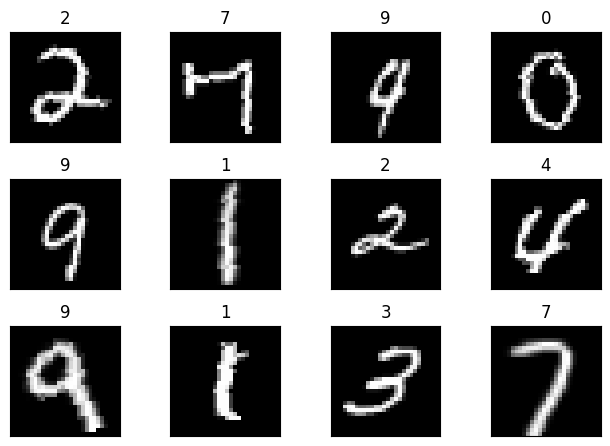

In [12]:
U.show_image_grid(train_dataloader)

## Generate model summary

In [15]:
model = Net().to('cpu')
U.show_summary(model, -1, 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


## Training

In [18]:
model = Net().to(device)

In [19]:
import torch.optim as optim

In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics)
    U.test(model, device, test_dataloader, metrics)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3034 Batch_id=117 Accuracy=52.07: 100%|██████████| 118/118 [00:28<00:00,  4.09it/s]


Test set: Average loss: 0.2712, Accuracy: 9201/10000 (92.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2488 Batch_id=117 Accuracy=93.52: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0929, Accuracy: 9707/10000 (97.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0261 Batch_id=117 Accuracy=96.05: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]


Test set: Average loss: 0.0641, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0152 Batch_id=117 Accuracy=97.03: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0505, Accuracy: 9838/10000 (98.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0578 Batch_id=117 Accuracy=97.47: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]


Test set: Average loss: 0.0521, Accuracy: 9837/10000 (98.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0379 Batch_id=117 Accuracy=97.88: 100%|██████████| 118/118 [00:22<00:00,  5.15it/s]


Test set: Average loss: 0.0396, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0347 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0400, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0252 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0326, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0780 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0312, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0120 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]


Test set: Average loss: 0.0299, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0332 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0315, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0087 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0267, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0142 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0265, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0167 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.0283, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0878 Batch_id=117 Accuracy=98.85: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0261, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0202 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0225, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0355 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]


Test set: Average loss: 0.0220, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0077 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0218, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0069 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0216, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0019 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0215, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Display Results

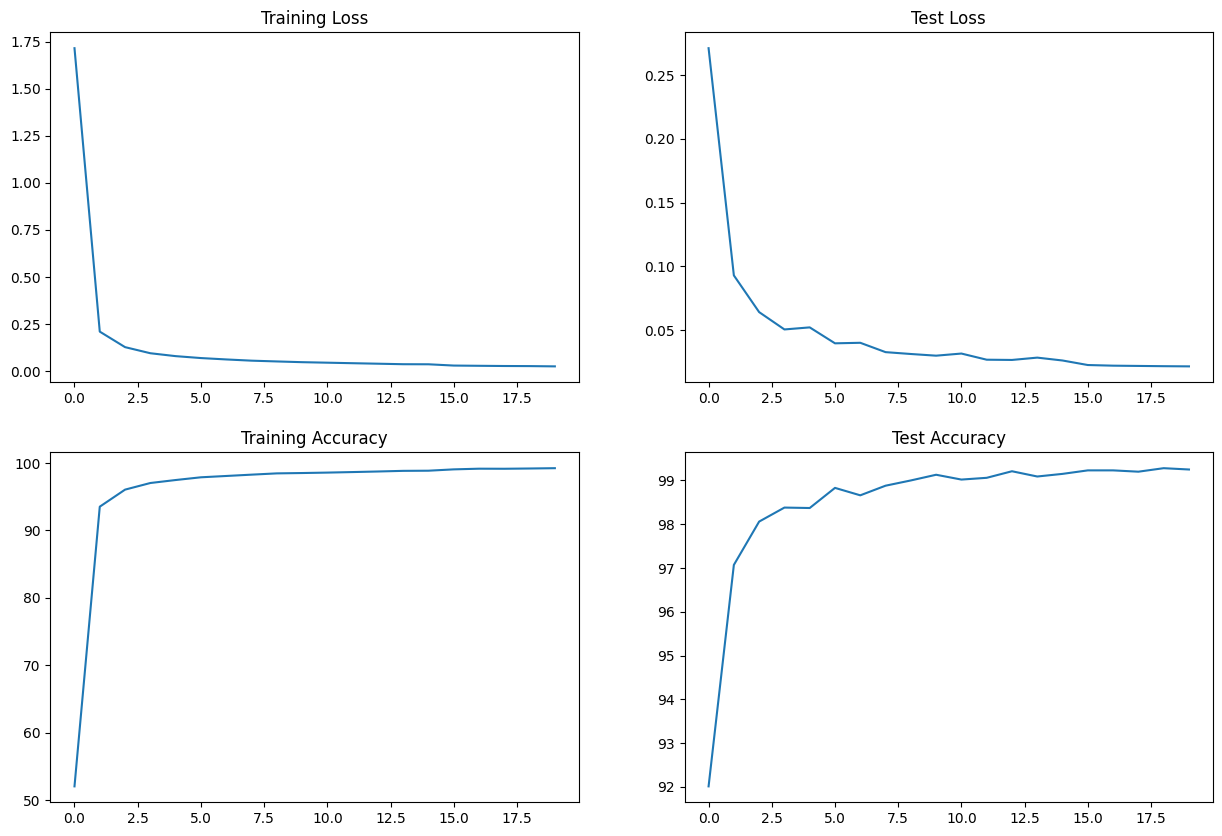

In [53]:
U.display_results(metrics)